# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#2 Bayes' classifier,k-means and k-NN</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [2]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classe')
print(dataset)

Feature|Classe
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [3]:
#write code here
#class=dataset[:,1]
class_array = dataset[:,1]
print(class_array)
count_zero=0
count_one=0
for i in class_array:
    if i==0:
        count_zero +=1
    else:
        count_one +=1
print("count_zero ",count_zero)
print("count_one ",count_one)
length = len(class_array)
probability_zero = (count_zero/length)
probability_one = (count_one/length)
print("Probability of zero ",probability_zero)
print("Probability of one ",probability_one)

[0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
count_zero  5
count_one  5
Probability of zero  0.5
Probability of one  0.5


### Find sample mean and sample standard deviation for each class 

In [4]:
#write code here
import math
count1=0
count2=0
j=0
# count the total value
for i in dataset:
    if dataset[j,1]==0:
        count1 += dataset[j,0]
    else:
        count2 +=dataset[j,0]
    j +=1
print("Total value of class 0",count1)
print("Total value of class 1",count2)
# sample mean for class 0
sm1=count1/count_zero
# sample mean for class 1
sm2=count2/count_one
print("Sample mean for class 0",sm1)
print("Sample mean for class 1",sm2)
cv1=0
cv2=0
j=0
for i in dataset:
    if dataset[j,1]==0:
        cv1 += (dataset[j,0]-sm1)**2
    else:
        cv2 +=(dataset[j,0]-sm2)**2
    j +=1
# print(cv1)
# print(cv2)
v1=(cv1/(count_zero-1))
v2=(cv2/(count_one-1))
print("Variance of class 0 ",v1)
print("Variance of class 1 ",v2)
sv1=math.sqrt(v1)
sv2=math.sqrt(v2)
print("Standard deviation of class 0 ",sv1)
print("Standard deviation of class 1 ",sv2)

Total value of class 0 13.7
Total value of class 1 38.05
Sample mean for class 0 2.7399999999999998
Sample mean for class 1 7.609999999999999
Variance of class 0  0.8591500000000001
Variance of class 1  1.5253499999999995
Standard deviation of class 0  0.9269034469673743
Standard deviation of class 1  1.2350506062506101


### Plot $p_1(x)$ and $p_2(x)$

In [5]:
# Calculate the Gaussian probability distribution function for x
import math
def calculate_probability(x, mean, stdev):
    #write code here
    d = stdev*(math.sqrt(2*math.pi))
    p = np.array(())
    for i in x:
        exponent = (-0.5)*(((float(i) - float(mean))/stdev)**2.0)
        e = math.exp(exponent)
        value = e/d
        p = np.append(p,value)
     #print(i,value)
    return p

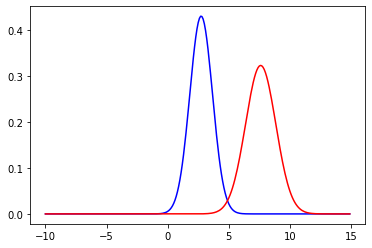

In [6]:
x  = np.arange(-10,15,0.1)
#print(x)
#y = calculate_probability(x,sm1,sv1)
#print(y)
plt.plot(x,calculate_probability(x,sm1,sv1),'b',x,calculate_probability(x,sm2,sv2),'r')

### Test for $x=3$  and $x=5$

In [7]:
#for x=3
#write code here
#we can do like this because for class 0 and class 1 probability are same
closuretozero = ((float(3)-sm1)/sv1)**2
closuretoone = ((float(3)-sm2)**2/sv2)**2
#print(closuretozero)
#print(closuretoone)
if closuretozero<closuretoone:
    print("class 0")
else:
    print("class 1")

class 0


In [8]:
#for x=5
#write code here
closuretozero = ((float(5)-sm1)/sv1)**2
closuretoone = ((float(5)-sm2)/sv2)**2
#print(closuretozero)
#print(closuretoone)
if closuretozero<closuretoone:
    print("class 0")
else:
    print("class 1")

class 1


## Homework:
1. Try for this 2-D data using classnote
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

1.Question

In [10]:
#write code here
#1st question
import pandas as pd
import numpy as np

dataset = pd.read_csv('csvs/Feature.csv')
#extract the feature
x = np.array((dataset.iloc[:, :-1].values))
#y contains class value
y = np.array((dataset.iloc[:, -1].values))

#find out the probability of class 0 and class 1
count_zero=0
count_one=0
for i in y:
    if i==0:
        count_zero +=1
    else:
        count_one +=1
print("count_zero ",count_zero)
print("count_one ",count_one)
length = len(y)
probability_zero = (count_zero/length)
probability_one = (count_one/length)
print("Probability of zero ",probability_zero)
print("Probability of one ",probability_one)
#print(x)
#print(dataset)
#find out the mean value
import math
feature1class0=0
feature2class0=0
feature1class1=0
feature2class1=0
# count the total value
for i in range(len(dataset)):
    c = dataset.loc[i,'Class']
    #print(c)
    if c==0:
        feature1class0 += dataset.loc[i,"X1"]
        feature2class0 +=dataset.loc[i,"X2"]
    else:
        feature1class1 +=dataset.loc[i,'X1']
        feature2class1 +=dataset.loc[i,"X2"]
    
print("Total value of class 0 feature1",feature1class0)
print("Total value of class 0 feature2",feature2class0)
print("Total value of class 1 feature1",feature1class1)
print("Total value of class 1 feature2",feature2class1)

# sample mean vector for class 0
smv1=np.array(((feature1class0/count_zero),(feature2class0/count_zero)))
# sample mean for class 1
smv2=np.array(((feature1class1/count_one),(feature2class1/count_one)))
print("Sample mean vector for class 0",smv1)
print("Sample mean vector for class 1",smv2)

#variance calculation
#class0
cv1f1class0=0
cv1f2class0=0
#class1
cv2f1class1=0
cv2f2class1=0
for i in range(len(dataset)):
    c = dataset.loc[i,'Class']
    if c==0:
        cv1f1class0 += (dataset.loc[i,'X1']-smv1[0])**2
        cv1f2class0 += (dataset.loc[i,'X2']-smv1[1])**2
    else:
        cv2f1class1 += (dataset.loc[i,'X1']-smv2[0])**2
        cv2f2class1 += (dataset.loc[i,'X2']-smv2[1])**2
    
# print(cv1)
# print(cv2)
v1f1=(cv1f1class0/(count_zero-1))
v1f2=(cv1f2class0/(count_zero-1))
v1vector=np.array((v1f1,v1f2))

#class 1
v2f1=(cv2f1class1/(count_one-1))
v2f2=(cv2f2class1/(count_one-1))
v2vector=np.array((v2f1,v2f2))

print("Variance vector of class 0 ",v1vector)
print("Variance vector of class 1 ",v2vector)
#standard variation for class0
sd1f1=math.sqrt(v1f1)
sd1f2=math.sqrt(v1f2)
sd1=np.array((sd1f1,sd1f2))

#standard deviation for class1
sd2f1=math.sqrt(v2f1)
sd2f2=math.sqrt(v2f2)
sd2=np.array((sd2f1,sd2f2))
print("Standard deviation vector of class 0 ",sd1)
print("Standard deviation vector of class 1 ",sd2)

#covariance
#class0
cv1xyclass0=0
#cv1yxclass0=0
cv2xyclass1=0
#cv2yxclass1=0
for i in range(len(dataset)):
    c = dataset.loc[i,'Class']
    if c==0:
        cv1xyclass0 +=(dataset.loc[i,'X1']-smv1[0])*(dataset.loc[i,'X2']-smv1[1])
    else:
        cv2xyclass1 += (dataset.loc[i,'X1']-smv2[0])*(dataset.loc[i,'X2']-smv1[1])

cv1xyclass0 /=(count_zero-1)
cv2xyclass1 /=(count_one-1)
print("Covariance of X1 and X2 for class0",cv1xyclass0)
print("Covariance of X1 and X2 for class1",cv2xyclass1)

#variance covariance matrix for class 0
matrixclass0=np.array(([v1f1,cv1xyclass0],[cv1xyclass0,v1f2]))
matrixclass1=np.array(([v2f1,cv2xyclass1],[cv2xyclass1,v2f2]))
print("Variance covariance Matrix for class0 \n",matrixclass0)
print("Variance covariance Matrix for class1 \n",matrixclass1)

#Here i use bivariant gaussian distribution
#here probability of both classes are same that's why 
#i am only finding distance and whatever distance is less we put in this class
class0inverse = np.linalg.inv(matrixclass0) 
class1inverse = np.linalg.inv(matrixclass1)
def calculate(x,m1,m2):
    v1 = np.array(())
    v2 = np.array(())
    length = len(x)
    for i in range(length):
        y1 = float(x[i])-smv1[i]
        y2 = float(x[i])-smv2[i]
        v1 = np.append(v1,y1)
        v2 = np.append(v2,y2)

    v1t=v1.transpose()
    v2t=v2.transpose()

    r1=np.dot(v1t,m1)
    r01=np.dot(r1,v1)

    r2=np.dot(v2t,m2)
    r02=np.dot(r2,v2)

    if r01<=r02:
        print("Class 0")
    else:
        print("Class 1")

y=int(input("How many test data you have?\n"))
for i in range(y):
    x=np.array(())
    d1, d2 = [int(x) for x in input("Enter x1 and x2: \n").split()]
    x =np.append(x,[d1,d2])
    print("X1 ",x[0],"X2 ",x[1])
    calculate(x,class0inverse,class1inverse)


count_zero  5
count_one  5
Probability of zero  0.5
Probability of one  0.5
Total value of class 0 feature1 13.7
Total value of class 0 feature2 15.0
Total value of class 1 feature1 38.05
Total value of class 1 feature2 14.940000000000001
Sample mean vector for class 0 [2.74 3.  ]
Sample mean vector for class 1 [7.61  2.988]
Variance vector of class 0  [0.85915 1.21885]
Variance vector of class 1  [1.52535 2.10922]
Standard deviation vector of class 0  [0.92690345 1.1040154 ]
Standard deviation vector of class 1  [1.23505061 1.45231539]
Covariance of X1 and X2 for class0 0.019075000000000186
Covariance of X1 and X2 for class1 -0.6770499999999999
Variance covariance Matrix for class0 
 [[0.85915  0.019075]
 [0.019075 1.21885 ]]
Variance covariance Matrix for class1 
 [[ 1.52535 -0.67705]
 [-0.67705  2.10922]]
How many test data you have?
2
Enter x1 and x2: 
3 2
X1  3.0 X2  2.0
Class 0
Enter x1 and x2: 
9 3
X1  9.0 X2  3.0
Class 1


2.Navie Bayes

**Step 1:PreProcess Step**
*   Load csv. 
*   When we load csv all the data comes in string format so we convert 
    independent attribute (4 column) in float and convert class
    (dependent) attribute in integer.  
*   return dataset for future implementation

In [12]:
from numpy import genfromtxt
from csv import reader

# Load a CSV file
def preprocessing(filename):
    
    def load_csv(filename):
        dataset = list()
        with open(filename, 'r') as file:
            csv_reader = reader(file)
            for row in csv_reader:
                if not row:
                    continue
                dataset.append(row)
        return dataset

    # Convert string column to float
    def str_column_to_float(dataset, column):
        for row in dataset:
            row[column] = float(row[column].strip())

    # Convert string column to integer
    def str_column_to_int(dataset, column):
        class_values = [row[column] for row in dataset]
        unique = set(class_values)
        lookup = dict()
        for i, value in enumerate(unique):
            lookup[value] = i
            print('[%s] => %d' % (value, i))
        for row in dataset:
            row[column] = lookup[row[column]]
        return lookup
     
    dataset = load_csv(filename)
    
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # convert class column to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    
    return dataset
    
df = preprocessing('csvs/Iris.csv')  

[Iris-virginica] => 0
[Iris-versicolor] => 1
[Iris-setosa] => 2


**Step 2:Separate Dataset by class and Summarize Dataset**

In [13]:
from math import sqrt
from math import exp
from math import pi
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

model = summarize_by_class(df)

**Step 3:Calculate Gausian Function Find class Probability and pedict for our dataset**

In [14]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

Data=[5.7, 2.9, 4.2, 1.3], Predicted: 1


## 2. K-Nearest neighbour (KNN)

Consider the following observations:
![image.png](attachment:image.png)

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [15]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


How many test data you have?
2
Enter x1 and x2: 
1 -1
X1  1.0 X2  -1.0
Sort according to euclidean distance
|Feature1    |Feature2    |Class    |Euclidean Distance  
[[ 1.         -1.          1.          0.        ]
 [-1.         -1.          1.          2.        ]
 [ 1.          1.          3.          2.        ]
 [ 2.          1.          3.          2.23606798]
 [-2.         -1.          1.          3.        ]
 [ 1.          2.          3.          3.        ]
 [-2.          1.          2.          3.60555128]
 [-2.          2.          2.          4.24264069]]


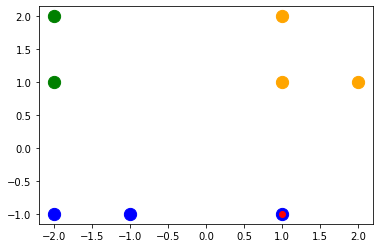

Test data is in Class 1
Enter x1 and x2: 
3 4
X1  3.0 X2  4.0
Sort according to euclidean distance
|Feature1    |Feature2    |Class    |Euclidean Distance  
[[ 1.          2.          3.          2.82842712]
 [ 2.          1.          3.          3.16227766]
 [ 1.          1.          3.          3.60555128]
 [-2.          2.          2.          5.38516481]
 [ 1.         -1.          1.          5.38516481]
 [-2.          1.          2.          5.83095189]
 [-1.         -1.          1.          6.40312424]
 [-2.         -1.          1.          7.07106781]]


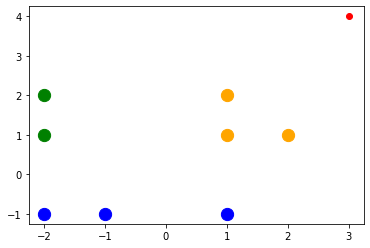

Test data is in Class 3


In [17]:
#write code here
import math
m1 = [-2,-1,1]
n1 = [-1,-1,-1]
m2 = [-2,-2]
n2 = [ 1, 2]
m3 = [1,1,2]
n3 = [1,2,1]
def distance(vect):
  # Array to be added as column
    column_to_be_added = np.array(())
    length=len(data)
    for i in range(length):
        p=np.array(())
        p1,p2=data[i,0],data[i,1]
        p=np.append(p,[p1,p2])
        ed=math.sqrt((vect[0]-p[0])**2+(vect[1]-p[1])**2)
        column_to_be_added=np.append(column_to_be_added,ed)
  
    # Adding column to numpy array
    datawitheuclideandistance = np.column_stack((data, column_to_be_added))
    after_sort = datawitheuclideandistance[datawitheuclideandistance[:,-1].argsort()]
    print("Sort according to euclidean distance")
    print("|Feature1    |Feature2    |Class    |Euclidean Distance  ")
    print(after_sort)
    plt.scatter(m1,n1,color='blue',s=150)
    plt.scatter(m2,n2,color='green',s=150)
    plt.scatter(m3,n3,color='orange',s=150)
    plt.scatter(vect[0],vect[1],color='red')
    plt.show()
    c0count=0
    c1count=0
    c2count=0
    for i in range(3):
        if after_sort[i,2]==1:
            c0count +=1
        elif after_sort[i,2]==2:
            c1count +=1
        else:
            c2count +=1
            
     #calculate our test dataset in which class
    if (c0count>=c1count) and (c0count>=c2count):
        print("Test data is in Class 1")
    elif (c1count>=c2count):
        print("Test data is in Class 2")
    else:
        print("Test data is in Class 3")
  #return math.dist(p,q)

y=int(input("How many test data you have?\n"))
for i in range(y):
    x=np.array(())
    d1, d2 = [int(x) for x in input("Enter x1 and x2: \n").split()]
    x =np.append(x,[d1,d2])
    print("X1 ",x[0],"X2 ",x[1])
    distance(x)

## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

intial centroids = 
 [[-2.          0.        ]
 [-0.66666667  0.        ]
 [ 1.33333333  1.33333333]]


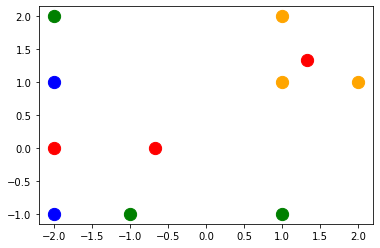

In [19]:
X = data[:,:-1]
x1 = data[0:2,0]
y1 = data[0:2,1]
x2 = data[2:5,0]
y2 = data[2:5,1]
x3 = data[5:8,0]
y3 = data[5:8,1]
m,n = X.shape
#print(m)
#print(n)
centroid = np.array(([(X[0,0]+X[1,0])/2,(X[0,1]+X[1,1])/2],[(X[2,0]+X[3,0]+X[4,0])/3,(X[2,1]+X[3,1]+X[4,1])/3],[(X[5,0]+X[6,0]+X[7,0])/3,(X[5,1]+X[6,1]+X[7,1])/3]))
#for i in range(len(X)):
c1=centroid[:,0]
c2=centroid[:,1]
plt.scatter(x1,y1,color='blue',s=150)
plt.scatter(x2,y2,color='green',s=150)
plt.scatter(x3,y3,color='orange',s=150)
plt.scatter(c1,c2,color='red',s=150)
print('intial centroids = \n',centroid)


In [20]:
#write code for kmeans
import math
def distance(A):
    # Array to be added as column
    distances = np.empty((0,4),float)
    length=len(X)
    for i in range(length):
        p=np.array(())
        p1,p2=data[i,0],data[i,1]
        p=np.append(p,[p1,p2])
        ed1=math.sqrt((A[0,0]-p[0])**2+(A[0,1]-p[1])**2)
        ed2=math.sqrt((A[1,0]-p[0])**2+(A[1,1]-p[1])**2)
        ed3=math.sqrt((A[2,0]-p[0])**2+(A[2,1]-p[1])**2)
        distances = np.append(distances, np.array([[i,ed1,ed2,ed3]]), axis=0)

    #distances=np.append(distances,np.array([[i,ed1,ed2,ed3]]),axis=0)
    print(distances)
    return distances

#function which tell which point is in which class
def again_class(d):
    for i in range(len(d)):
        if d[i,1]<=d[i,2] and d[i,1]<=d[i,3]:
            print("X",i," is in C1 ")
        elif d[i,2]<=d[i,3]:
            print("X",i," is in C2")
        else:
            print("X",i," is in C3")
d = distance(centroid)
again_class(d)

[[0.         1.         1.66666667 4.06885187]
 [1.         1.         1.66666667 3.34995854]
 [2.         2.         2.40370085 3.39934634]
 [3.         1.41421356 1.05409255 3.29983165]
 [4.         3.16227766 1.94365063 2.3570226 ]
 [5.         3.16227766 1.94365063 0.47140452]
 [6.         3.60555128 2.60341656 0.74535599]
 [7.         4.12310563 2.84800125 0.74535599]]
X 0  is in C1 
X 1  is in C1 
X 2  is in C1 
X 3  is in C2
X 4  is in C2
X 5  is in C3
X 6  is in C3
X 7  is in C3


now centroid is 
 [[-2.          0.66666667]
 [ 0.         -1.        ]
 [ 1.33333333  1.33333333]]
Continue 
[[0.         1.66666667 2.         4.06885187]
 [1.         0.33333333 2.82842712 3.34995854]
 [2.         1.33333333 3.60555128 3.39934634]
 [3.         1.94365063 1.         3.29983165]
 [4.         3.43187671 1.         2.3570226 ]
 [5.         3.01846171 2.23606798 0.47140452]
 [6.         3.2829526  3.16227766 0.74535599]
 [7.         4.01386486 2.82842712 0.74535599]]
X 0  is in C1 
X 1  is in C1 
X 2  is in C1 
X 3  is in C2
X 4  is in C2
X 5  is in C3
X 6  is in C3
X 7  is in C3


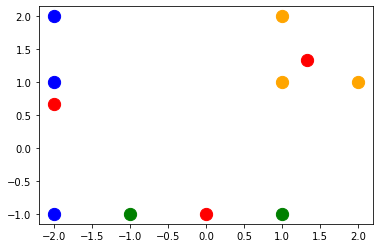

In [21]:
#according to above assumption
centroid1 = np.array(([(X[0,0]+X[1,0]+X[2,0])/3,(X[0,1]+X[1,1]+X[2,1])/3],[(X[3,0]+X[4,0])/2,(X[3,1]+X[4,1])/2],[(X[5,0]+X[6,0]+X[7,0])/3,(X[5,1]+X[6,1]+X[7,1])/3]))
print("now centroid is \n",centroid1)

comparison = centroid == centroid1 
equal_arrays = comparison.all() 
if equal_arrays:
    print("Stop ")
else:
    print("Continue ")
    d2=distance(centroid1)
    again_class(d2)
x1 = data[0:3,0]
y1 = data[0:3,1]
x2 = data[3:5,0]
y2 = data[3:5,1]
x3 = data[5:8,0]
y3 = data[5:8,1]
c1 = centroid1[:,0]
c2 = centroid1[:,1]
plt.scatter(x1,y1,color='blue',s=150)
plt.scatter(x2,y2,color='green',s=150)
plt.scatter(x3,y3,color='orange',s=150)
plt.scatter(c1,c2,color='red',s=150)

In [23]:
#according to above assumption
centroid2 = np.array(([(X[0,0]+X[1,0]+X[2,0])/3,(X[0,1]+X[1,1]+X[2,1])/3],[(X[3,0]+X[4,0])/2,(X[3,1]+X[4,1])/2],[(X[5,0]+X[6,0]+X[7,0])/3,(X[5,1]+X[6,1]+X[7,1])/3]))
print("now centroid is \n",centroid1)

comparison = centroid1 == centroid2 
equal_arrays = comparison.all() 
if equal_arrays:
    print("Stop ")
    print("New centroid is same as Previous centroid")
    # Array to be added as column
    column_to_be_added = np.array([1, 1, 1, 2, 2, 3, 3, 3])
  
    # Adding column to numpy array
    result = np.column_stack((X, column_to_be_added))
    print(result)

else:
    print("Continue ")
    d2=distance(centroid1)
    again_class(d2)

now centroid is 
 [[-2.          0.66666667]
 [ 0.         -1.        ]
 [ 1.33333333  1.33333333]]
Stop 
New centroid is same as Previous centroid
[[-2. -1.  1.]
 [-2.  1.  1.]
 [-2.  2.  1.]
 [-1. -1.  2.]
 [ 1. -1.  2.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]
